# Exploring data with Seaborn plots

In this assignment, we will analyze two datasets. First, we will explore [World Happiness Report 2019](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019), which is a landmark survey to determine the global happiness ranking of 156 countries by their own citizens. The report uses six factors (social support, freedom, corruption, generosity, GDP per capital, and health life expectancy) to evaluate a happy life. A __lower score__ will have a __higher__ contribution to the calculation of Happiness Score. <br>
The dataset contains the following columns: <br>

1. __Country__: name of the country (categorical)<br>
2. __Ladder__: Cantril Ladder is a measure of life satisfaction (numeric)<br>
3. __SD of Ladder__: Standard deviation of the ladder (numeric)<br>
4. __Positive Affect__: Measure of positive emotion (numeric)<br>
5. __Negative Affect__: Measure of negative emotion (numeric)<br>
6. __Social Support__: Social Support contributed to the calculation of the Happiness Score (continuous)<br>
7. __Freedom__: Freedom contribution to the calculation of the Happiness Score (continuous)<br>
8. __Corruption__: Corruption contribution to the calculation of the Happiness Score (continuous)<br>
9. __Generosity__: Generosity contribution to the calculation of the Happiness Score (continuous)<br>
10. __Log of GDP per capita__: GDP contribution to the calculation of the Happiness Score (continuous)<br>
11. __Health Life Expectancy__: Health Life Expectancy contribution to the calculation of the Happiness Score (continuous)<br>

The second dataset is [The World Development Indicators](https://www.kaggle.com/worldbank/world-development-indicators) from the World Bank which contains annual indicators of economic development from countries around the world. <br>
Selected columns we will explore include the following: <br>
1. __Country__: Name of the country (categorical)<br>
2. __Region__: Region of country (categorical)<br>
3. __Income Group__: Country average income earning (categorical)<br>
4. __System of Trade__: Trade system of country (categorical)<br>

In [1]:
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
 


In [2]:
# Import file 

report = pd.read_csv('world-happiness-report-2019.csv')
report.columns = ['Country','Ladder','SD of Ladder','Positive affect',
                  'Negative affect','Social support','Freedom',
                  'Corruption','Generosity','Log of GDP per capita',
                  'Health life expectancy']

columns_float = ['Ladder','SD of Ladder','Positive affect',
                 'Negative affect','Social support','Freedom',
                 'Corruption','Generosity','Log of GDP per capita',
                 'Health life expectancy']

report[columns_float] = report[columns_float].astype(float)


indicators = pd.read_csv('Country.csv')

# Trim selected columns 
indicators = indicators.loc[:,['TableName','Region','IncomeGroup',
                               'SystemOfTrade']] 
# Rename colummn to join with report dataset 
indicators.rename(columns={'TableName':'Country'}, inplace=True)

indicators.columns = ['Country','Region','IncomeGroup','SystemOfTrade']

indicators_category = ['Country','Region','IncomeGroup','SystemOfTrade']

indicators[indicators_category] = indicators[indicators_category].astype('category')

data = pd.merge(report, indicators, on='Country', how='inner')

data.head()


,Country,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Health life expectancy,Region,IncomeGroup,SystemOfTrade
0,Finland,1.0,4.0,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe & Central Asia,High income: OECD,General trade system
1,Denmark,2.0,13.0,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe & Central Asia,High income: OECD,Special trade system
2,Norway,3.0,8.0,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe & Central Asia,High income: OECD,General trade system
3,Iceland,4.0,9.0,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe & Central Asia,High income: OECD,General trade system
4,Netherlands,5.0,1.0,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe & Central Asia,High income: OECD,Special trade system


In [3]:
print(data.shape)

(136, 14)


There are currently 136 rows and 14 columns.

In [4]:
# Check for null values 

print(data.isnull().sum())

Country                   0
Ladder                    0
SD of Ladder              0
Positive affect           1
Negative affect           1
Social support            1
Freedom                   1
Corruption                8
Generosity                1
Log of GDP per capita     1
Health life expectancy    2
Region                    0
IncomeGroup               0
SystemOfTrade             4
dtype: int64


We can see that there are mulitple null values in majority of the columns. Although not generally advised, we will drop the null values since the purpose of this assignment is to explore the data with Seaborn plots.

In [5]:
# Drop rows with missing values

data.dropna(inplace=True)

print(data.shape)

(123, 14)


After running the dropna function, we can see that the number of rows have been reduced from 136 to 123 with all NaN rows removed. 

## Let's take a closer look at Corruption 

We will plot corruption four ways and discuss our findings of each plot. 



/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Percent of Corruption'),
 Text(0.5,0,''),
 Text(0.5,1,'Plot 4: Normalized histogram')]

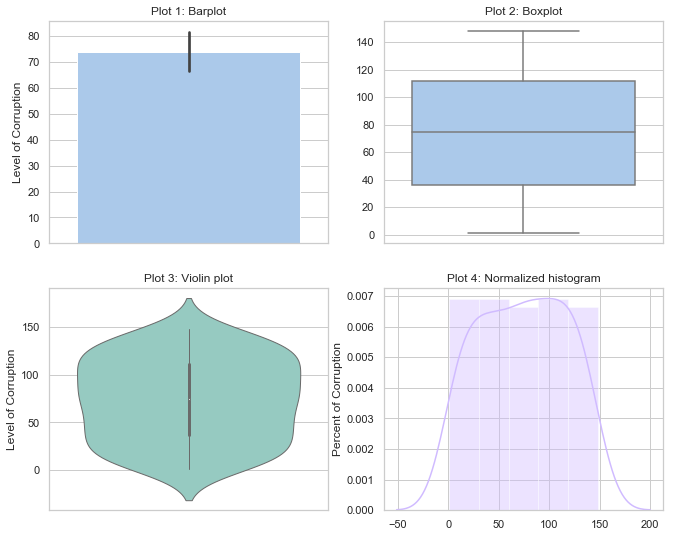

In [6]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(11, 9))
sns.set_color_codes("pastel")

plt.subplot(2, 2, 1)
g = sns.barplot(y="Corruption", data=data, color="b")
g.set(ylabel='Level of Corruption', xlabel='', 
      title='Plot 1: Barplot')

plt.subplot(2, 2, 2)
g = sns.boxplot(y="Corruption", data=data, color="b")
g.set(xlabel='', ylabel='', title='Plot 2: Boxplot')

plt.subplot(2, 2, 3)
g = sns.violinplot(data=data, y='Corruption', 
               palette="Set3",linewidth=1)
g.set(ylabel='Level of Corruption', xlabel='', 
      title='Plot 3: Violin plot')

plt.subplot(2, 2, 4)
d = data.Corruption
g = sns.distplot(d, color="m")
g.set(ylabel='Percent of Corruption', xlabel='', 
      title='Plot 4: Normalized histogram')

The barplot is a visualization of the distribution of global corruption. Although the plot shows the mean precentage of corruption among countries with a 95% confidence interval, the bar is not very insightful into determining the shape of the distribution. 

The boxplot provides more information about the dataset than plot 1. With the interquartile range, we can gain a better understanding of the distribution. There is a centeral tendency around the 75% mark and no outliers are apparent.

Similarly to the boxplot, the violin plot also displays information about the interquartile range. Plot 3 also shows the variance of the data so we can see how populated each range is. Since a violin plot is not often utilized in general practice, a nontechnical audence would not be able to read the plot. 

Plot 4 is a normalized histogram and offers information on the distribution of the variable. Since the distribution is normalized, the graph does not allow us to see the actual density of the datapoints in each bin. 

## Comparing Corruption and Social Support

We will plot the relationship between global corruption and soical support.

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Level of Social Support'),
 Text(0.5,0,'Level of Corruption'),
 Text(0.5,1,'Plot 7: Boxplot')]

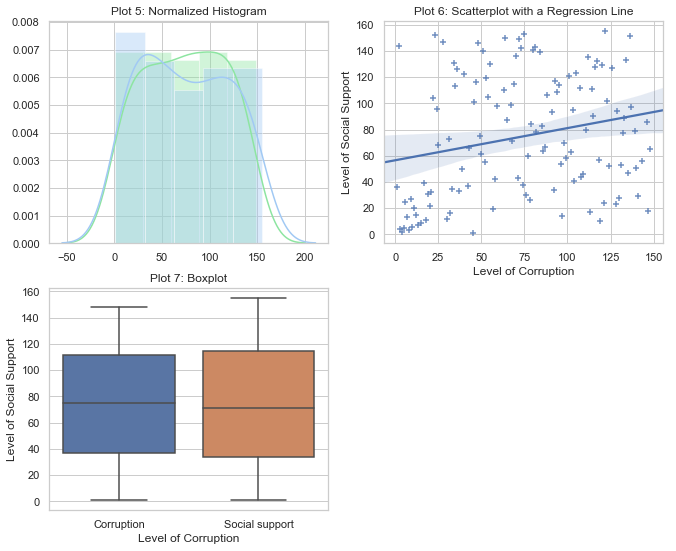

In [7]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(11, 9))
sns.set_color_codes("pastel")

plt.subplot(2, 2, 1)
g = sns.distplot(data['Corruption'], color='g')
g = sns.distplot(data['Social support'], color='b')
g.set(xlabel='', ylabel='', title='Plot 5: Normalized Histogram')

plt.subplot(2, 2, 2)
x = data['Corruption']
y = data['Social support']
g = sns.regplot(x=x, y=y, marker="+")
g.set(xlabel='Level of Corruption', ylabel='Level of Social Support', 
      title='Plot 6: Scatterplot with a Regression Line')

plt.subplot(2, 2, 3)
d1 = data[['Corruption','Social support']]
g = sns.boxplot(data=d1)
g.set(xlabel='Level of Corruption', 
      ylabel='Level of Social Support', 
      title='Plot 7: Boxplot')

Similar to plot 4, this histogram shows the distribution of the two variables. However, it does not offer much insight on relationship between the variables.

Plot 6 is a scatterplot with a regression line that displays the relationship between corruption and social support with a 68% confidence interval. Despite the relationship between the variables, it is difficult to interpret the meaning of this plot.

Finally, this boxplot enables easy comparison between the two continuous variables unlike the busy scatterplot. On the other hand, plot 7 does not show us the relationship between the variables like the scatterplot.

## Comparing Region and GDP 
Next, we will plot region (categorical variable) and GDP (continous variable). 

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


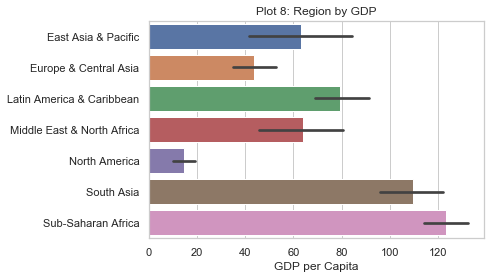

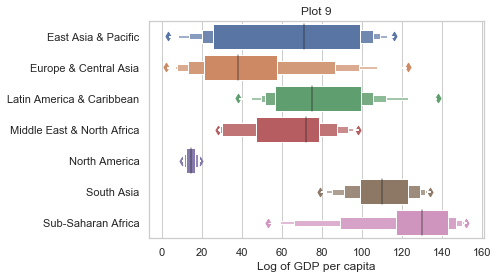

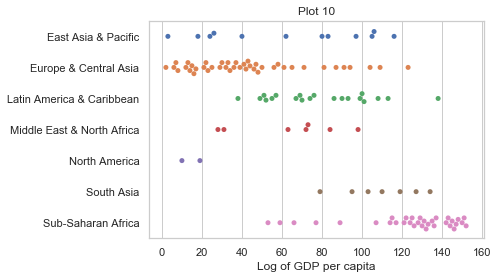

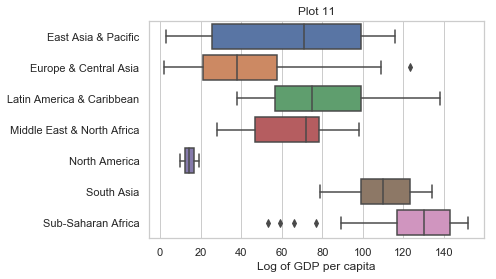

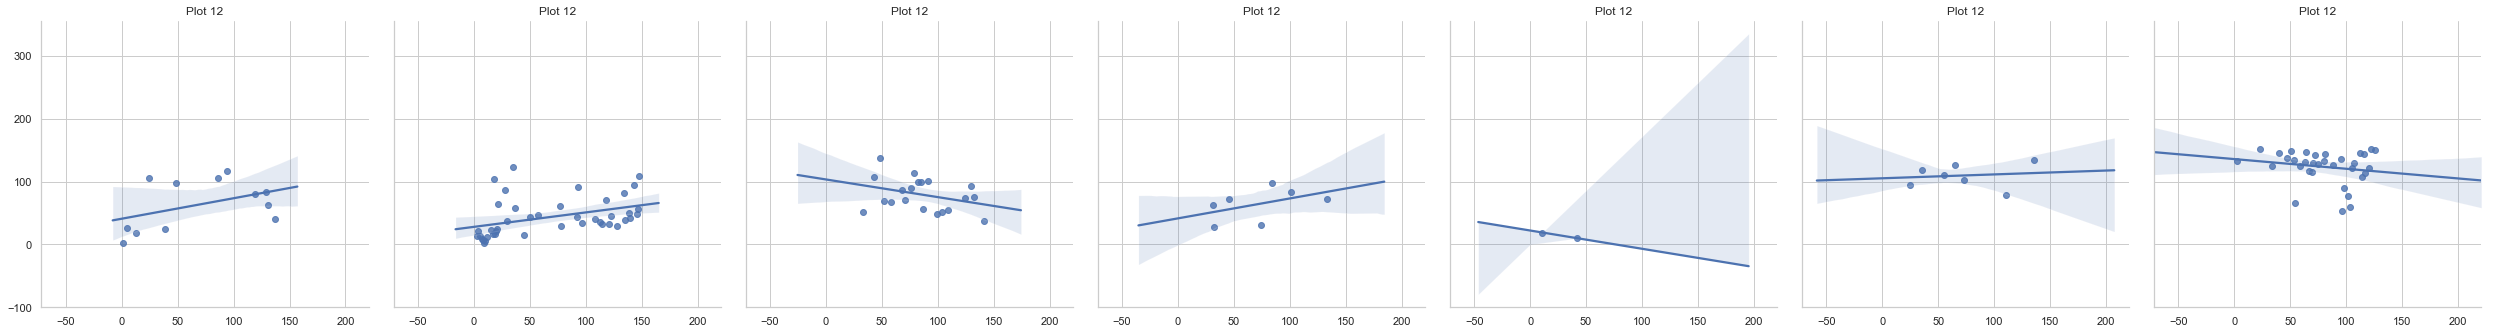

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


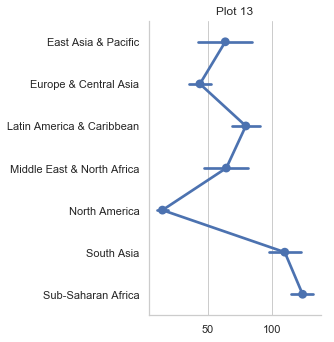

In [8]:

ax1 = sns.barplot(y='Region', x='Log of GDP per capita', data=data)
ax1.set(xlabel='GDP per Capita', ylabel='', title='Plot 8: Region by GDP')
plt.show()

ax2 = sns.boxenplot(y='Region', x='Log of GDP per capita', data=data)
ax2.set(xlabel='Log of GDP per capita',ylabel='',title='Plot 9')
plt.show()

ax3 = sns.swarmplot(y='Region', x='Log of GDP per capita', 
                   data=data)
ax3.set(xlabel='Log of GDP per capita',ylabel='',title='Plot 10')
plt.show()

ax4 = sns.boxplot(y='Region', x='Log of GDP per capita', data=data)
ax4.set(xlabel='Log of GDP per capita',ylabel='',title='Plot 11')
plt.show()

ax5 = sns.lmplot(x='Corruption',y='Log of GDP per capita', 
                data=data, col='Region')
ax5.set(xlabel='',ylabel='',title='Plot 12')
plt.show()

ax6 = sns.factorplot(y='Region',x='Log of GDP per capita', 
                data=data)
ax6.set(xlabel='',ylabel='',title='Plot 13')
plt.show()

Plot 8 is useful in visualizing and comparing the GDP of each region. Because the bar graph is focused on one aspect of the data, we cannot see other information about the variables such as outliers or distribution of the dataset.

Plot 9 is able to display the central tendencies of each region and give more insight on outliers. However, it is not the most effective in displaying the relationship between the two variables. 

Similar to the previous plot, plot 10 enables us to see clusters and density of the data. Unlike plot 9, additional information in plot 10 such as, the interquartile range of each region's GDP per capita, is not as apparent. 

Plot 11 is a basic boxplot that is very useful in determining the interquartile range and outliers. I would also say that plot 11 is easier to read than plot 9. However, this boxplot does not show the variance of data in each quartile like plot 9.

With these series of graphs, we can see the relationship between Corruption and Log of GDP per capita within each region. We can see the distribution and counts of data points in each group. The number of graphs is a bit busy. 

Unlike the previous series of graphs, plot 13 is less busy and easier to view. This graph offers information on the correlation and variance in the data. However, we cannot see the overall distribution of each variable. 

## Masterplots

Finally, we will create a masterplot to see how Country (one categorical variable) will interact with the following continuous variables: soical support, freedom, generosity, and health life expectancy. 

In [9]:
d = data.loc[:,['Country','Social support','Freedom',
                'Generosity','Health life expectancy']]

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/tsawaengsri/anaconda3/l

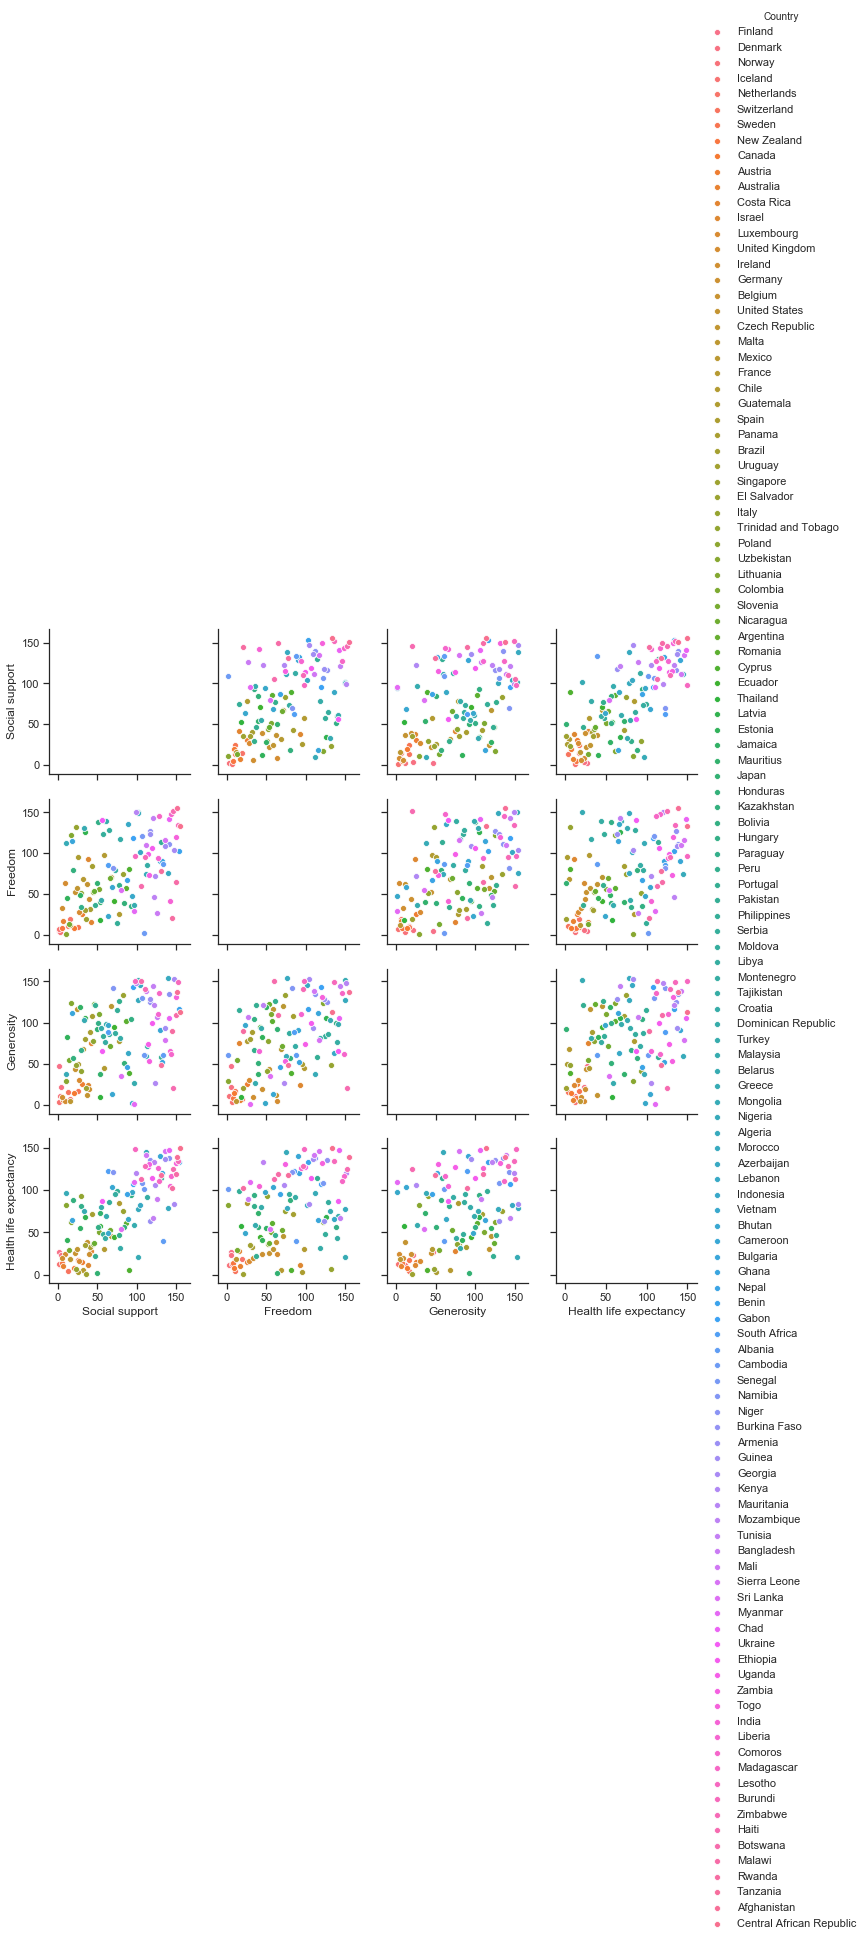

In [10]:

sns.set(style="ticks")
sns.pairplot(d, hue="Country")

The countries are arranged from the most to least happiest based on citizens perception. Countries in the top 20s are labeled as peach and yellow. We can observe that these colors are mainly in the lower left corner of majority of the graphs. Whereas countries in the bottom 20, labeled pink and purple, are generally clustered along the upper right corner of the graphs. Social support and health life expectancy appears to have a stronger correlation than the other variables. 

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


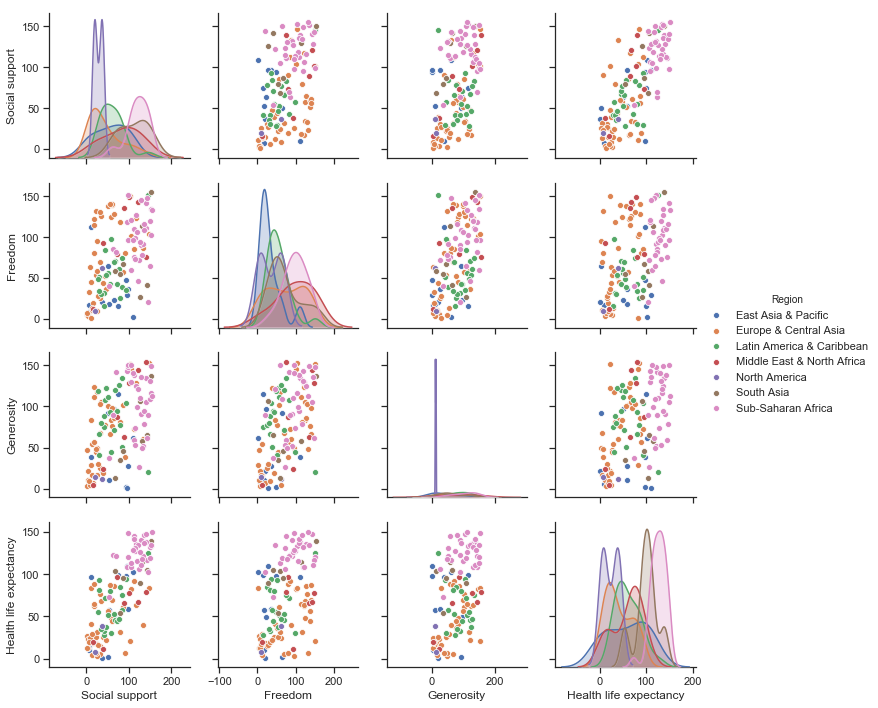

In [12]:
d2 = data.loc[:,['Social support','Freedom',
                'Generosity','Health life expectancy','Region']]

sns.set(style="ticks")
sns.pairplot(d2, hue='Region')

This pair plot grouped by regions reveals similar trends to the previous master plot. Majority of the data clustered in the lower left corner consist of data points from the European & Central Asia and North America region. We can also see some spares red dots from the Middle East & North Africa and East Asia & Pacific region in the lower left corner. Again, the upper right corner is predominately populated by the least happy citizens from the South Asia and Sub-Saharan Africa region.